In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/VHAALTVidalE/Python_Codes/breast-cancer.data.txt")
df.columns = ["Class", "Age", "Menopause", "Tumor-Size", "Inv-Nodes", "Node_Caps","Deg-Malig","Breast","Breast-Quad","Irradiation"]
df.head()

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   Age          285 non-null    object
 2   Menopause    285 non-null    object
 3   Tumor-Size   285 non-null    object
 4   Inv-Nodes    285 non-null    object
 5   Node_Caps    285 non-null    object
 6   Deg-Malig    285 non-null    int64 
 7   Breast       285 non-null    object
 8   Breast-Quad  285 non-null    object
 9   Irradiation  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [4]:
df.shape

(285, 10)

In [5]:
df["Class"].value_counts()

no-recurrence-events    200
recurrence-events        85
Name: Class, dtype: int64

In [6]:
from sklearn import __version__ as sklv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, average_precision_score, make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
lb_make = LabelEncoder()
df["Class"] = lb_make.fit_transform(df["Class"])
df["Age"] = lb_make.fit_transform(df["Age"])
df["Menopause"] = lb_make.fit_transform(df["Menopause"])
df["Tumor-Size"] = lb_make.fit_transform(df["Tumor-Size"])
df["Inv-Nodes"] = lb_make.fit_transform(df["Inv-Nodes"])
df["Node_Caps"] = lb_make.fit_transform(df["Node_Caps"])
df["Breast"] = lb_make.fit_transform(df["Breast"])
df["Breast-Quad"] = lb_make.fit_transform(df["Breast-Quad"])
df["Irradiation"] = lb_make.fit_transform(df["Irradiation"])
df.head(20)

,Class,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
0,0,2,2,3,0,1,2,1,5,0
1,0,2,2,3,0,1,2,0,2,0
2,0,4,0,2,0,1,2,1,3,0
3,0,2,2,0,0,1,2,1,4,0
4,0,4,0,2,0,1,2,0,2,0
5,0,3,2,4,0,1,2,0,2,0
6,0,4,0,3,0,1,1,0,2,0
7,0,2,2,10,0,1,2,0,2,0
8,0,2,2,3,0,1,2,1,3,0
9,0,2,2,0,0,1,3,0,1,0


In [8]:
df["Class"].value_counts()

0    200
1     85
Name: Class, dtype: int64

In [9]:
x = df.to_numpy()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]],
                                                    df['Class'],
                                                    train_size=0.75,
                                                    random_state=30,
                                                    stratify=df['Class'])
print("No. of samples in training set: ", x_train.shape[0])
print("No. of samples in test set:", x_test.shape[0])

No. of samples in training set:  213
No. of samples in test set: 72


In [11]:
x_train.head()

,Age,Menopause,Tumor-Size,Inv-Nodes,Node_Caps,Deg-Malig,Breast,Breast-Quad,Irradiation
92,4,0,3,0,1,2,1,3,0
185,3,0,4,0,1,1,0,4,0
154,4,0,7,4,1,2,1,3,1
189,2,2,2,1,1,3,1,4,1
103,2,2,1,0,1,2,1,2,0


In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 92 to 282
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          213 non-null    int32
 1   Menopause    213 non-null    int32
 2   Tumor-Size   213 non-null    int32
 3   Inv-Nodes    213 non-null    int32
 4   Node_Caps    213 non-null    int32
 5   Deg-Malig    213 non-null    int64
 6   Breast       213 non-null    int32
 7   Breast-Quad  213 non-null    int32
 8   Irradiation  213 non-null    int32
dtypes: int32(8), int64(1)
memory usage: 10.0 KB


In [13]:
features = StandardScaler().fit_transform(x_train)

In [14]:
pca = PCA(n_components=0.99, whiten=True)
features_pca = pca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 9
Reduced number of features: 9


Create Logistic Regression Object

In [15]:
logis_reg = LogisticRegression(random_state=0)

Train the Model

In [16]:
model = logis_reg.fit(x_train,y_train)

Model is now trained. Predict the test data.

In [17]:
predict = model.predict(x_test)

In [18]:
model.score(x_test, y_test)

0.7916666666666666

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
acc=accuracy_score(y_test,predict)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc)
print( "confusion_matrix")
print( confusion_matrix(y_test, predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

Accuracy: 0.7916666666666666
confusion_matrix
[[49  2]
 [13  8]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        51
           1       0.80      0.38      0.52        21

    accuracy                           0.79        72
   macro avg       0.80      0.67      0.69        72
weighted avg       0.79      0.79      0.76        72



In [20]:
randomforest = RandomForestClassifier(random_state=0, n_estimators=100)
model_forest = randomforest.fit(x_train,y_train)

In [21]:
predict_forest = model_forest.predict(x_test)

In [22]:
predict_forest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0])

In [23]:
model_forest.score(x_test, y_test)

0.7083333333333334

In [24]:
acc_forest=accuracy_score(y_test,predict_forest)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc_forest)
print( "confusion_matrix")
print( confusion_matrix(y_test, predict_forest))
print(classification_report(y_test, predict_forest))
print(randomforest.feature_importances_)

Accuracy: 0.7083333333333334
confusion_matrix
[[41 10]
 [11 10]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        51
           1       0.50      0.48      0.49        21

    accuracy                           0.71        72
   macro avg       0.64      0.64      0.64        72
weighted avg       0.70      0.71      0.71        72

[0.12209005 0.04764576 0.24296585 0.08549605 0.0852377  0.13728694
 0.0795605  0.15143576 0.04828139]


In [25]:
print(model_forest.feature_importances_)

[0.12209005 0.04764576 0.24296585 0.08549605 0.0852377  0.13728694
 0.0795605  0.15143576 0.04828139]


In [28]:
importances = model_forest.feature_importances_

In [29]:
indices = np.argsort(importances)[::-1]

In [30]:
names = [df.columns[i] for i in indices]

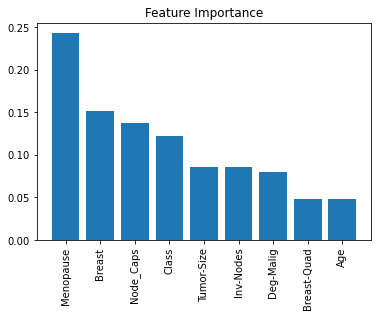

In [32]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x_test.shape[1]), importances[indices])
plt.xticks(range(x_test.shape[1]), names, rotation=90)
plt.show()

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

Create a decision Tree Object

In [42]:
decisiontree = DecisionTreeClassifier(random_state=0)

In [43]:
model_tree = decisiontree.fit(x_train, y_train)

In [44]:
predict_tree = model_tree.predict(x_test)
predict_tree

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0])

In [45]:
model_tree.score(x_test, y_test)

0.5972222222222222

In [46]:
acc_tree=accuracy_score(y_test,predict_tree)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc_tree)
print( "confusion_matrix")
print( confusion_matrix(y_test, predict_tree))
print(classification_report(y_test, predict_tree))

Accuracy: 0.5972222222222222
confusion_matrix
[[34 17]
 [12  9]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        51
           1       0.35      0.43      0.38        21

    accuracy                           0.60        72
   macro avg       0.54      0.55      0.54        72
weighted avg       0.62      0.60      0.61        72



Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
naivebayes = GaussianNB()
model_naivebayes = naivebayes.fit(x_train, y_train)

In [50]:
predict_naivebayes = model_naivebayes.predict(x_test)
predict_naivebayes

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0])

In [51]:
model_naivebayes.score(x_test, y_test)

0.75

In [52]:
acc_bayes=accuracy_score(y_test,predict_naivebayes)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc_bayes)
print( "confusion_matrix")
print( confusion_matrix(y_test, predict_naivebayes))
print(classification_report(y_test, predict_naivebayes))

Accuracy: 0.75
confusion_matrix
[[41 10]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        51
           1       0.57      0.62      0.59        21

    accuracy                           0.75        72
   macro avg       0.70      0.71      0.71        72
weighted avg       0.76      0.75      0.75        72



SVM

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(kernel='linear')

In [58]:
model_svc=svc.fit(x_train, y_train)

In [59]:
predict_svc = model_svc.predict(x_test)
predict_svc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0])

In [60]:
model_svc.score(x_train, y_train)

0.7089201877934272

In [61]:
model_svc.score(x_test, y_test)

0.7777777777777778

In [62]:
acc_svc=accuracy_score(y_test,predict_svc)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc_svc)
print( "confusion_matrix")
print( confusion_matrix(y_test, predict_svc))
print(classification_report(y_test, predict_svc))

Accuracy: 0.7777777777777778
confusion_matrix
[[46  5]
 [11 10]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        51
           1       0.67      0.48      0.56        21

    accuracy                           0.78        72
   macro avg       0.74      0.69      0.70        72
weighted avg       0.77      0.78      0.77        72



In [63]:
from sklearn.ensemble import StackingClassifier

In [64]:
base_models = [('random_forest', RandomForestClassifier(n_estimators=100)),
               ('svm', SVC(kernel='linear')),
               ('naives', GaussianNB()),
              ('decision tree', DecisionTreeClassifier(random_state=0))]
meta_model = LogisticRegression(random_state=0)
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [71]:
stacking_model.fit(x_train,y_train).score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.7777777777777778

In [72]:
final_model=stacking_model.fit(x_train,y_train).score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [75]:
final_model_1=stacking_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [76]:
final_model_predict = final_model_1.predict(x_test)
final_model_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0])

In [77]:
final_model_1.score(x_train, y_train)

0.7746478873239436

In [78]:
final_model_1.score(x_test, y_test)

0.7777777777777778

In [79]:
acc_stac=accuracy_score(y_test,final_model_predict)
#prec=precision_score(Y_test, y_pred,average='micro')
#recall=recall_score(Y_test, y_pred)
#f1_v=f1_score(Y_test, y_pred)
print("Accuracy:" ,acc_stac)
print( "confusion_matrix")
print( confusion_matrix(y_test, final_model_predict))
print(classification_report(y_test, final_model_predict))

Accuracy: 0.7777777777777778
confusion_matrix
[[49  2]
 [14  7]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        51
           1       0.78      0.33      0.47        21

    accuracy                           0.78        72
   macro avg       0.78      0.65      0.66        72
weighted avg       0.78      0.78      0.75        72

